In [1]:
import pandas as pd
import numpy as np
import scipy.ndimage as sp
import cv2
import matplotlib.pyplot as plt

In [2]:
#Problem 1
def gradient_magnitude(image):
    kernel1 = np.array([
        [0, 0, 0], 
        [-1, 1, 0], 
        [0, 0, 0]])
    kernel2 = np.array([
        [0, -1, 0],
        [0, 1, 0],
        [0, 0, 0]])
    gradx = cv2.filter2D(image, -1, kernel1)
    grady = cv2.filter2D(image, -1, kernel2)
    return gradx+grady

    

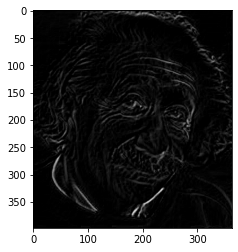

In [3]:
image = cv2.imread("Image1.png", 0)
grad = gradient_magnitude(image)
plt.imshow(grad, cmap="gray")

In [4]:
#Problem 2
def laplacian_(image):
    kernel = np.array([
        [0, -1, 0],
        [-1, 4,-1],
        [0, -1, 0]])
    lap = cv2.filter2D(image, -1, kernel)
    return lap
    

[[ 0  1  0 ...  0  0  2]
 [ 2  0  0 ...  1  0  2]
 [ 0  0  1 ...  0  1  0]
 ...
 [16 11 15 ... 33 27 11]
 [10 12  8 ...  0  3  0]
 [ 0  0  0 ...  0  0  0]]


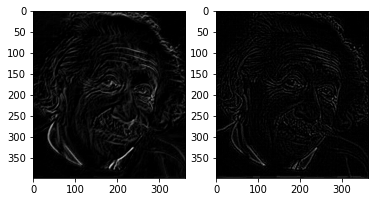

In [5]:
fig, ax = plt.subplots(1, 2)
image = cv2.imread("Image1.png", 0)
ax[0].imshow(gradient_magnitude(image), cmap="gray")
print(laplacian_(image))
ax[1].imshow(laplacian_(image), cmap="gray")

In [25]:
#Problem 3
#Zero crossings occur when the sign changes in an image
def zero_crossing(image):
    gaus = cv2.GaussianBlur(image, (5, 5), sigmaX=1)
    LoG = laplacian_(gaus)
    zrc = cv2.threshold(LoG,0,255,cv2.THRESH_BINARY)
    return np.array(zrc[1])
    
    
            
    

[[  0   0   0 ...   0   0   0]
 [  0 255   0 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [255 255 255 ... 255 255   0]
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ...   0   0   0]]


<ipython-input-25-01dbd6471068>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(zrc)


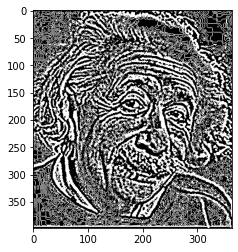

In [31]:
zrc = zero_crossing(image)
print(zrc[1])
plt.imshow(zrc[1], cmap="gray")